In [24]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [25]:
df=pd.read_csv('C:\\Users\\raymo\\Downloads\\Top_companies.csv')

In [3]:
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [26]:
#check for duplicate records
df_duplicate=df[df['Company'].duplicated(keep=False)]
df_duplicate

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude


In [27]:
df.drop(['Global Rank'],axis=1,inplace=True)

In [6]:
#check for null values
df.isnull()

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1919,False,False,False,False,False,False,False,False,False
1920,False,False,False,False,False,False,False,False,False
1921,False,False,False,False,False,False,False,False,False
1922,False,False,False,False,False,False,False,False,False


In [28]:
#let's introduce an expense column 
df['Expenses ($billion)']=round(df['Sales ($billion)']-df['Profits ($billion)'],2)

In [29]:
#let's add a field ROI to show us the return on investment ratio
df['ROI']=round(df['Sales ($billion)']/df['Expenses ($billion)'],2)
df.head()

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI
0,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397,97.0,1.39
1,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397,82.5,1.37
2,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891,86.9,1.25
3,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891,133.8,1.10
4,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891,375.8,1.12


In [8]:
#let's see which companies had the highest profit ratio
df.sort_values(by='ROI',ascending=False).head(20)

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI
1654,RMB Holdings,0.6,0.6,3.3,6.1,South Africa,Africa,-30.559482,22.937506,0.0,inf
839,Power Assets Holdings,1.3,1.3,13.1,19.5,Hong Kong,Asia,22.396428,114.109497,0.0,inf
1408,GPT Group,0.7,0.6,9.7,6.0,Australia,Oceania,-25.274398,133.775136,0.1,7.00
1143,Global Logistic Properties,0.6,0.5,13.6,9.8,Singapore,Asia,1.352083,103.819836,0.1,6.00
601,Unibail-Rodamco,2.3,1.9,39.0,22.2,France,Europe,46.227638,2.213749,0.4,5.75
639,Wheelock & Co,4.3,3.5,49.4,10.0,Hong Kong,Asia,22.396428,114.109497,0.8,5.37
1823,CapitaMall Trust,0.5,0.4,8.1,5.8,Singapore,Asia,1.352083,103.819836,0.1,5.00
1378,Exxaro Resources,1.5,1.2,4.9,6.4,South Africa,Africa,-30.559482,22.937506,0.3,5.00
602,Yahoo,5.0,3.9,17.1,24.3,USA,North America,37.090240,-95.712891,1.1,4.55
1921,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia,1.352083,103.819836,0.2,4.50


The ROI serves to enlighten shareholders and investors which companies were most likely to maximise their returns.
In this case **GPT Group(Australia)**, a REIT returned the highest ROI the year 2020.

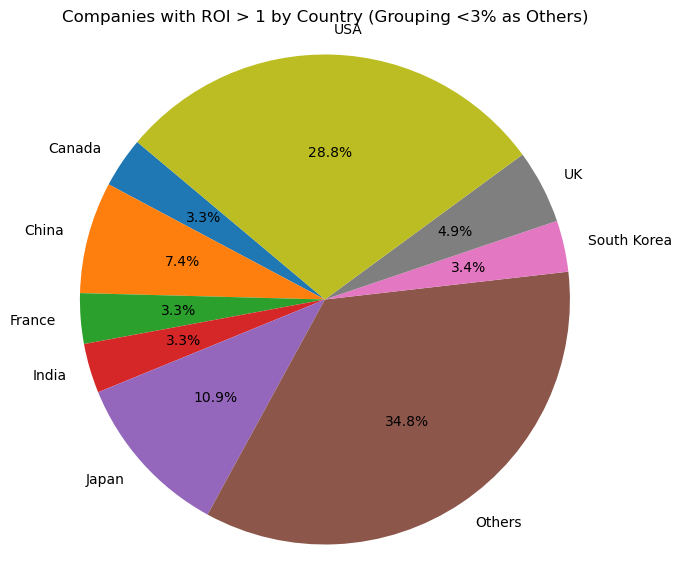

In [51]:
#let's plot companies with an ROI>1 by country
filtered_df = df[df['ROI'] > 1]
roi_by_country = filtered_df.groupby('Country').size().reset_index(name='Count')
total_count = roi_by_country['Count'].sum()
# Step 4: Replace countries with <3% of total count as 'Others'
threshold = 0.03 * total_count
roi_by_country['Country'] = roi_by_country.apply(lambda row: 'Others' if row['Count'] < threshold else row['Country'], axis=1)
roi_by_country = roi_by_country.groupby('Country')['Count'].sum().reset_index()
plt.figure(figsize=(8,7))
plt.pie(roi_by_country['Count'], labels=roi_by_country['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Companies with ROI > 1 by Country (Grouping <3% as Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The USA has the largest share of profitable companies by ROI, followed by Japan and China.

In [45]:
#let's see which companies had the biggest market value
df.sort_values(by='Market Value ($billion)',ascending=False).head(20)

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
15,Apple,164.7,41.7,196.1,416.6,USA,North America,37.090240,-95.712891,123.0,1.34,Profitable
4,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891,375.8,1.12,Profitable
65,Google,50.2,10.7,93.8,268.4,USA,North America,37.090240,-95.712891,39.5,1.27,Profitable
8,PetroChina,308.9,18.3,347.8,261.2,China,Asia,35.861660,104.195397,290.6,1.06,Profitable
9,Berkshire Hathaway,162.5,14.8,427.5,252.8,USA,North America,37.090240,-95.712891,147.7,1.10,Profitable
3,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891,133.8,1.10,Profitable
14,Wal-Mart Stores,469.2,17.0,203.1,242.5,USA,North America,37.090240,-95.712891,452.2,1.04,Profitable
32,IBM,104.5,16.6,119.2,239.5,USA,North America,37.090240,-95.712891,87.9,1.19,Profitable
0,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397,97.0,1.39,Profitable
39,Microsoft,72.9,15.5,128.7,234.8,USA,North America,37.090240,-95.712891,57.4,1.27,Profitable


In [30]:
#let's create a new field category which shows us which of these companies were profitable or not
df['category'] = 'Profitable'
df.loc[df['ROI'] < 1, 'category'] = 'Non-Profitable'
df.head(10)

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
0,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397,97.0,1.39,Profitable
1,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397,82.5,1.37,Profitable
2,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.090240,-95.712891,86.9,1.25,Profitable
3,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.090240,-95.712891,133.8,1.10,Profitable
4,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.090240,-95.712891,375.8,1.12,Profitable
5,HSBC Holdings,104.9,14.3,2684.1,201.3,UK,Europe,55.378051,-3.435973,90.6,1.16,Profitable
6,Royal Dutch Shell,467.2,26.6,360.3,213.1,The Netherlands,Europe,52.132633,5.291266,440.6,1.06,Profitable
7,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,Asia,35.861660,104.195397,80.0,1.29,Profitable
8,PetroChina,308.9,18.3,347.8,261.2,China,Asia,35.861660,104.195397,290.6,1.06,Profitable
9,Berkshire Hathaway,162.5,14.8,427.5,252.8,USA,North America,37.090240,-95.712891,147.7,1.10,Profitable


In [31]:
# let's group non-profitable companies in the year 2020 in the list together and figure out how 
# many companies are profitable and how many are not

non_profitable_firms=df[df['category']=='Non-Profitable']
profitable_firms=df[df['category']=='Profitable']

num_non_profitable_firms=len(non_profitable_firms)
num_profitable_firms=len(profitable_firms)

print("Number of non_profitable firms: ",num_non_profitable_firms)
print('Number of profitable_firms: ',num_profitable_firms)

Number of non_profitable firms:  166
Number of profitable_firms:  1758


In [11]:
non_profitable_firms.head()

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
376,Lloyds Banking Group,75.6,-2.3,1495.9,53.8,UK,Europe,55.378051,-3.435973,77.9,0.97,Non-Profitable
384,Barclays,55.7,-1.7,2422.5,62.3,UK,Europe,55.378051,-3.435973,57.4,0.97,Non-Profitable
403,Royal Bank of Scotland,42.1,-9.4,2133.1,52.0,UK,Europe,55.378051,-3.435973,51.5,0.82,Non-Profitable
416,Deutsche Telekom,76.9,-6.9,136.1,48.4,Germany,Europe,51.165691,10.451526,83.8,0.92,Non-Profitable
417,Rio Tinto,51.0,-3.0,117.6,98.5,UK,Europe,55.378051,-3.435973,54.0,0.94,Non-Profitable


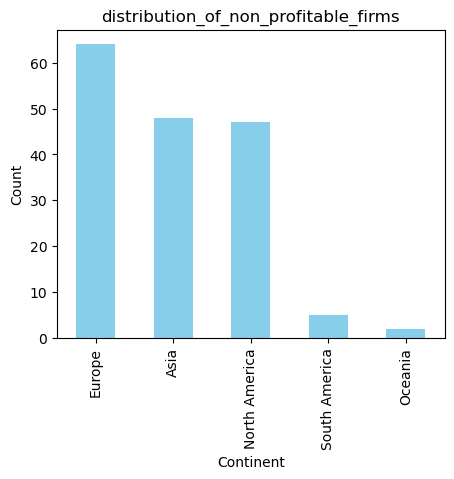

In [12]:
#let's see distribution of non_profitable_firms across continents
distribution_of_non_profitable_firms=non_profitable_firms['Continent'].value_counts()
plt.figure(figsize=(5,4))

distribution_of_non_profitable_firms.plot(kind='bar',color='skyblue')
plt.title('distribution_of_non_profitable_firms')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

Europe had the highest count of non_profitable companies in the year 2020.

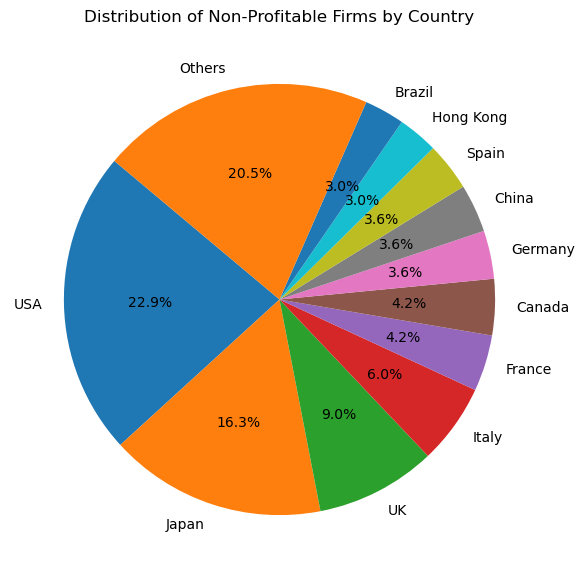

In [13]:
#let's deduct and group non-profitable companies by country
non_profitable_country_count = non_profitable_firms['Country'].value_counts()
total_non_profitable_firms = len(non_profitable_firms)
#we will cluster all countries with a threshold <3% together as "others" to keep the pie clean
percentage_threshold = 0.03  # 3%

# Identify countries with a percentage lower than the threshold
small_countries = non_profitable_country_count[non_profitable_country_count / total_non_profitable_firms < percentage_threshold]

# Replace these small countries with 'Others'
non_profitable_country_count['Others'] = small_countries.sum()
non_profitable_country_count = non_profitable_country_count.drop(small_countries.index)

plt.figure(figsize=(7, 7))
plt.pie(non_profitable_country_count, labels=non_profitable_country_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Non-Profitable Firms by Country')
plt.show()

USA has the highest count of non-profitable companies with 38 companies in the list.

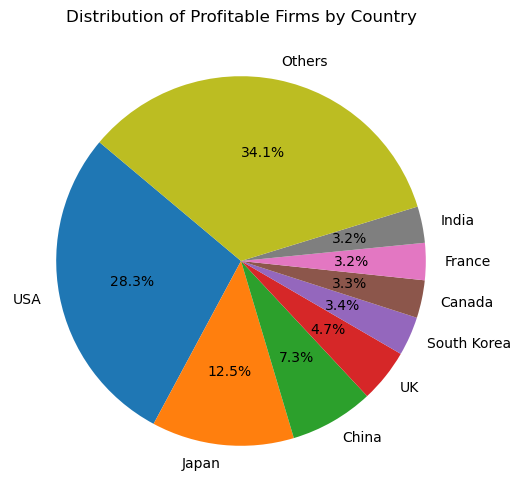

In [14]:
#let's deduct countries with the most profitable firms
profitable_firms_country_count=profitable_firms['Country'].value_counts()

total_firms = len(profitable_firms)
percentage_threshold = 0.03  # 3%
small_percentage_countries = profitable_firms_country_count[profitable_firms_country_count / total_firms < percentage_threshold]

profitable_firms_country_count['Others'] = small_percentage_countries.sum()
profitable_firms_country_count = profitable_firms_country_count.drop(small_percentage_countries.index)

plt.figure(figsize=(7, 6))
plt.pie(profitable_firms_country_count, labels=profitable_firms_country_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profitable Firms by Country')

plt.show()

The USA by far has the highest count of profitable companies and we could confidently say china has more profitable companies than unprofitable ones.

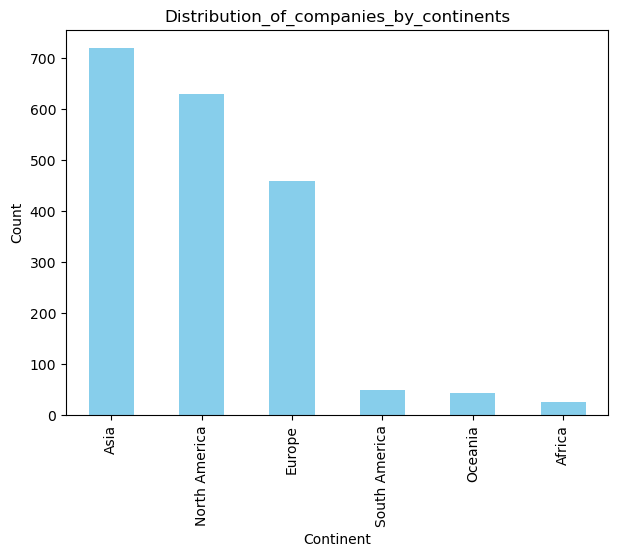

In [15]:
#let's see the distribution of the companies per continent 
continent_distribution=df['Continent'].value_counts()
plt.figure(figsize=(7,5))
continent_distribution.plot(kind='bar',color='skyblue')
plt.title('Distribution_of_companies_by_continents')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

We could take a look at these Asian companies doing so well

In [40]:
#We could take a look at these Asian companies doing so well
Asian_companies=df[df['Continent']=='Asia']
Asian_companies

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
0,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.861660,104.195397,97.0,1.39,Profitable
1,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.861660,104.195397,82.5,1.37,Profitable
7,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,Asia,35.861660,104.195397,80.0,1.29,Profitable
8,PetroChina,308.9,18.3,347.8,261.2,China,Asia,35.861660,104.195397,290.6,1.06,Profitable
10,Bank of China,98.1,22.1,2033.8,131.7,China,Asia,35.861660,104.195397,76.0,1.29,Profitable
...,...,...,...,...,...,...,...,...,...,...,...,...
1911,Poly Property Group,2.7,0.3,13.9,2.2,Hong Kong,Asia,22.396428,114.109497,2.4,1.13,Profitable
1916,LG International,11.4,0.2,4.7,1.4,South Korea,Asia,35.907757,127.766922,11.2,1.02,Profitable
1918,Bank of Saga,0.5,0.0,25.0,0.4,Japan,Asia,36.204824,138.252924,0.5,1.00,Profitable
1920,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia,36.204824,138.252924,0.4,1.25,Profitable


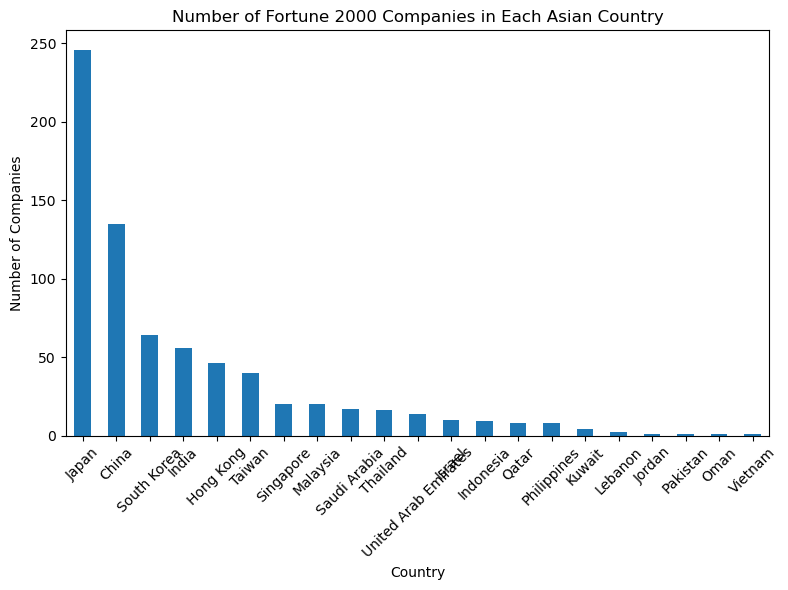

In [19]:
#let's deduct the number of companies under each asian country
country_count=Asian_companies['Country'].value_counts()
plt.figure(figsize=(8, 6))
country_count.plot(kind='bar')
plt.title('Number of Fortune 2000 Companies in Each Asian Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From above, Japan has the most fortune 2000 companies in Asia.

In [55]:
#let's deduct these profitable companies in Japan as the country has stood out
Japan_companies = df[(df['Country'] == 'Japan') & (df['ROI'] > 1)]
Japan_companies.head(50)

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
26,Mitsubishi UFJ Financial,59.0,11.9,2653.1,85.7,Japan,Asia,36.204824,138.252924,47.1,1.25,Profitable
30,Toyota Motor,224.5,3.4,371.3,167.2,Japan,Asia,36.204824,138.252924,221.1,1.02,Profitable
44,Nippon Telegraph & Tel,126.9,5.6,226.0,58.2,Japan,Asia,36.204824,138.252924,121.3,1.05,Profitable
50,Sumitomo Mitsui Financial,47.3,6.3,1733.2,57.6,Japan,Asia,36.204824,138.252924,41.0,1.15,Profitable
74,Mizuho Financial,32.8,5.9,2005.0,53.7,Japan,Asia,36.204824,138.252924,26.9,1.22,Profitable
81,Nissan Motor,113.7,4.1,133.4,43.4,Japan,Asia,36.204824,138.252924,109.6,1.04,Profitable
82,Honda Motor,96.0,2.6,140.9,72.4,Japan,Asia,36.204824,138.252924,93.4,1.03,Profitable
105,Mitsubishi Corp,67.2,5.5,152.6,32.1,Japan,Asia,36.204824,138.252924,61.7,1.09,Profitable
112,Hitachi,116.8,4.2,113.2,28.5,Japan,Asia,36.204824,138.252924,112.6,1.04,Profitable
121,Mitsui & Co,63.4,5.2,109.3,27.0,Japan,Asia,36.204824,138.252924,58.2,1.09,Profitable


In [20]:
#Africa does have some several companies on the list, let's deduct them
African_companies=df[df['Continent']=='Africa']
African_companies

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude,Expenses ($billion),ROI,category
220,Standard Bank Group,21.0,1.9,182.0,19.9,South Africa,Africa,-30.559482,22.937506,19.1,1.10,Profitable
307,Sasol,20.8,2.9,24.7,29.4,South Africa,Africa,-30.559482,22.937506,17.9,1.16,Profitable
333,MTN Group,16.5,2.5,21.4,34.5,South Africa,Africa,-30.559482,22.937506,14.0,1.18,Profitable
381,FirstRand,8.4,1.6,94.1,18.0,South Africa,Africa,-30.559482,22.937506,6.8,1.24,Profitable
553,Sanlam,10.8,0.7,52.3,10.7,South Africa,Africa,-30.559482,22.937506,10.1,1.07,Profitable
902,AngloGold Ashanti,6.1,0.8,12.6,9.5,South Africa,Africa,-30.559482,22.937506,5.3,1.15,Profitable
931,Steinhoff International,9.9,0.7,16.2,5.0,South Africa,Africa,-30.559482,22.937506,9.2,1.08,Profitable
951,Bidvest Group,16.4,0.5,6.8,8.1,South Africa,Africa,-30.559482,22.937506,15.9,1.03,Profitable
1007,Attijariwafa Bank,3.4,0.5,43.5,6.7,Morocco,Africa,31.791702,-7.092620,2.9,1.17,Profitable
1015,Naspers,5.1,0.4,10.5,27.7,South Africa,Africa,-30.559482,22.937506,4.7,1.09,Profitable


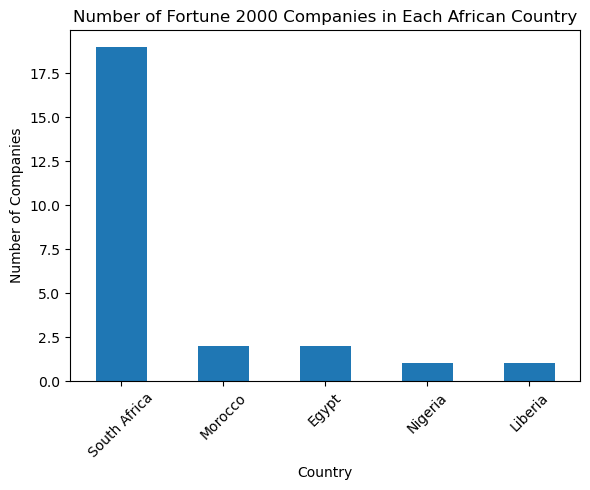

In [21]:
African_count=African_companies['Country'].value_counts()
plt.figure(figsize=(6, 5))
ax=African_count.plot(kind='bar')
plt.title('Number of Fortune 2000 Companies in Each African Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

South Africa as the largest share of the companies.

In [17]:
#let's see the correlation between fields
df['Assets ($billion)'].corr(df['Market Value ($billion)'])

0.375544041631358

In [18]:
df['Profits ($billion)'].corr(df['Assets ($billion)'])

0.3565529304989671

In [37]:
df['Assets ($billion)'].corr(df['Sales ($billion)'])

0.3560689966287377

In [22]:
df['Profits ($billion)'].corr(df['Market Value ($billion)'])

0.788852869300853

In [58]:
df['Sales ($billion)'].corr(df['Profits ($billion)'])

0.5941737947906564

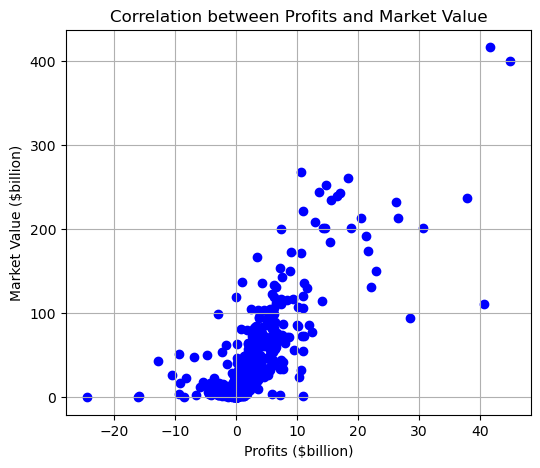

In [23]:
#correlation plot between profits and market_value
plt.figure(figsize=(6, 5))
plt.scatter(df['Profits ($billion)'], df['Market Value ($billion)'], color='blue')
plt.title('Correlation between Profits and Market Value')
plt.xlabel('Profits ($billion)')
plt.ylabel('Market Value ($billion)')
plt.grid(True)
plt.show()

From the correlations above we deduct that **profits and market value** have a higher positive correlation than other fields i.e.,
When the profits  go up so does the market value($billion).
This might be the good environment good profit margins create for investors as the higher the profits the higher the shares' demand.

In [30]:
#We want to perform a hypothesis to deduct if the average sales in asia compared to N.America are significantly different or not
asia_sales = df[df['Continent'] == 'Asia']['Sales ($billion)']
north_america_sales = df[df['Continent'] == 'North America']['Sales ($billion)']
# Perform t-test for Sales between Asia and North America
t_stat, p_value = ttest_ind(asia_sales, north_america_sales, equal_var=False)

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

Fail to reject the null hypothesis: The means are not significantly different.


In [34]:
print(p_value)

0.05594347332547716 -1.9133367182024006


This means we can't say the average sales of N.America and Asia differ significantly that one continent has an advantage over the other.

In [39]:
Asia_assets = df[df['Continent'] == 'Asia']['Assets ($billion)']
North_america_assets = df[df['Continent'] == 'North America']['Assets ($billion)']
#perform t-test for assets in Asia and N.America
t_stat, p_value = ttest_ind(Asia_assets, North_america_assets, equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The Assets are significantly different.")
else:
    print("Fail to reject the null hypothesis: The Assets are not significantly different.")

Fail to reject the null hypothesis: The Assets are not significantly different.


In [40]:
print(p_value)

0.9786117733544124


The assets between the two continents are not significantly different.

In [42]:
#let's perform a linear regression that will attempt to predict Assets value based on Sales and profits earned

#let's give sales and assets respective predictor variables
X = df[['Sales ($billion)', 'Profits ($billion)']]
y = df['Assets ($billion)']
#add a constant to a predictor variable
X=sm.add_constant(X)
#we now fit a linear regression model
model=sm.OLS(y,X).fit()
#print a summary of the linear regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Assets ($billion)   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.26e-73
Time:                        15:05:22   Log-Likelihood:                -13270.
No. Observations:                1924   AIC:                         2.655e+04
Df Residuals:                    1921   BIC:                         2.656e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.1638      6

Let's deduct insights from the OLS model analysis
1. R-Squared value of 0.159 means that approximately 15.9% of the variability in Assets can be explained ,by the linear relationship between sales and profits.
   R-squared value tells us what proportion of variance in our dependent variable can be tied up to our independent variables

2. F-static tests the null hypothesis to be true(there is no relationship between assets,sales and profits). 
   Our Prob(F-statistic) has a very small value of 4.26 which suggests that one of our independent variables is Significantly related to assets.

3. Co-efficients and P-values:
   Co-efficient shows us how a change in our dependent variable is closely associated with another independent variable while holding other variables constant.
   
4. P-value supports the probability of the null hypothesis:(there is no relationship between the dependent and independent variables). In this case, our p-values are 0.000 which is lesser than 0.05 suggesting our test is statistically significant
   
In this case we can confidently deduct that:

1. Sales and profits are significant predictors of assets

2. On average, For every 1 billion dollar increase in sales, the assets will as well increase approximately by $ 1.6781 billion holding profits constant

3. On average, For every 1 billion dollar increase in profits, assets will increase approximately by $ 17.14 billion holding sales constant

4. Only about 15% of variation in assets can be explained via a change in sales and profits, meaning other unmeasured factors play a part.

5. Assets will have an estimated constant value of $ 26.16 billion when both sales and profits are zero.

        